In [1]:
import sys
sys.path.append('..')
import pandas as pd
import importlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../../data/processed_reviews.csv')
df = df[['subcategory','review_text', 'star_rating']]

In [3]:
from TopicModel import bertopic_kmeans

/Users/jessicaluo/Desktop/BTT-Clorox-Company/clorox_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [4]:
importlib.reload(bertopic_kmeans)
from bertopic_kmeans import BERTopic_kmeans

In [5]:
method = BERTopic_kmeans(df)

# run on one subcategory

In [6]:
# %%time
# subcat = 'SPRAY CLEANERS BLEACH CLEANERS'
# res_df = method.train_model_subcategory(subcat, verbose=2, calc_similarity=False)

In [7]:
# subcat_filter = res_df['subcategory'] == subcat
# res_df[subcat_filter & (res_df['star_rating']==1)].sample(5)

In [8]:
# res_df = method.calculate_similarity_score(subcat)

In [9]:
# res_df = method.df
# res_df[subcat_filter & (res_df['star_rating']==1)].sample(5)

# run on multiple subcategories

In [10]:
subcats = df['subcategory'].value_counts().where(lambda x: (x<15000) & (x > 1000)).dropna().index
subcats = ["AIR FRESHENER", "SPRAY CLEANERS BLEACH CLEANERS"]

In [11]:
len(subcats)

2

1 min 8 sec in total for ['FLOOR CLEANERS', 'TOILET BOWL CLEANERS', 'SPRAY CLEANERS BLEACH CLEANERS']

In [12]:
res_df = pd.DataFrame()
start_index = 0
subcats = subcats[start_index:]
for subcat in subcats:
    print(subcat)
    res = method.train_model_subcategory(subcat, verbose=2)
    # save results
    # subcat_name = subcat.replace('/', '_')
    # res[res['subcategory']==subcat].to_csv(f'../../data/bertopic_kmeans_{subcat_name}_top15words.csv', index=False)
    res_df = pd.concat([res_df, res[res['subcategory']==subcat]])

AIR FRESHENER

Creating BERTopic kmeans models for AIR FRESHENER
Creating BERTopic kmeans model for 1.0 star rating with 926 reviews, 3 topics


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


Topic 0: Poorly scented or bad smelling fragrance with unpleasant odors
	['scent', 'fragrance', 'smell', 'odor', 'stink', 'lavender', 'spray', 'waste', 'nose', 'oil']
Topic 1: Defective products and poor purchase experience
	['order', 'receive', 'purchase', 'buy', 'refund', 'arrive', 'return', 'send', 'defective', 'try']
Topic 2: Buggy or sticky fragrancing sprayer with poor scent emission
	['spray', 'sprayer', 'fragrance', 'mist', 'scent', 'aerosol', 'nozzle', 'smell', 'try', 'sticky']
Finished creating BERTopic kmeans model for 1.0 in 8.70 seconds

--------------------------------------------------
Creating BERTopic kmeans model for 2.0 star rating with 362 reviews, 3 topics
Topic 0: Unpleasant scent or odor issues with fragrances
	['fragrance', 'scent', 'perfume', 'smell', 'odor', 'cologne', 'mist', 'lavender', 'spray', 'diffuser']
Topic 1: Underwhelming scent experience without adequate refill options
	['fragrance', 'scent', 'smell', 'spray', 'canister', 'mist', 'refill', 'diffuser

In [20]:
# save results
res_df.to_csv(f'../../data/bertopic_kmeans_spray_cleaners_air_freshener.csv', index=False)

In [28]:
pd.set_option('display.max_colwidth', None)
topic_infos = []
for subcat in subcats:
    topic_info = method.get_topic_information(subcat)
    topic_info.loc[:, 'subcategory'] = subcat
    topic_infos.append(topic_info)

# concat dataframes in topic_infos

topic_infos_df = pd.concat(topic_infos)
topic_infos_df

,star_rating,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score,count,subcategory
0,1.0,Buggy or sticky fragrancing sprayer with poor scent emission,0.447454,146,AIR FRESHENER
1,1.0,Defective products and poor purchase experience,0.203835,354,AIR FRESHENER
2,1.0,Poorly scented or bad smelling fragrance with unpleasant odors,0.508564,426,AIR FRESHENER
3,2.0,Battery doesn't work or break down within a month,0.171510,81,AIR FRESHENER
4,2.0,Underwhelming scent experience without adequate refill options,0.391528,84,AIR FRESHENER
5,2.0,Unpleasant scent or odor issues with fragrances,0.521331,197,AIR FRESHENER
6,3.0,"Air fresheners or sprays with varying odors, suitable for bedrooms, potentially helpful for asthma.",0.444177,174,AIR FRESHENER
7,3.0,Comfortable underwear with absorbency and discreet wear,0.099316,205,AIR FRESHENER
8,3.0,Pleasant scent with a strong lavender fragrance,0.485302,204,AIR FRESHENER
9,4.0,Fresh lavender scent with lasting freshness in the bathroom,0.451334,767,AIR FRESHENER


In [15]:
topic_infos_rating_avgd = topic_infos_df.groupby(['subcategory', 'star_rating']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()
topic_infos_rating_avgd

,subcategory,star_rating,bertopic_kmeans_similarity_score,count
0,AIR FRESHENER,1.0,0.386618,926
1,AIR FRESHENER,2.0,0.361456,362
2,AIR FRESHENER,3.0,0.342932,583
3,AIR FRESHENER,4.0,0.376092,1089
4,AIR FRESHENER,5.0,0.349270,8201
5,SPRAY CLEANERS BLEACH CLEANERS,1.0,0.321922,272
6,SPRAY CLEANERS BLEACH CLEANERS,2.0,0.412400,97
7,SPRAY CLEANERS BLEACH CLEANERS,3.0,0.413332,165
8,SPRAY CLEANERS BLEACH CLEANERS,4.0,0.396838,420
9,SPRAY CLEANERS BLEACH CLEANERS,5.0,0.388964,3777


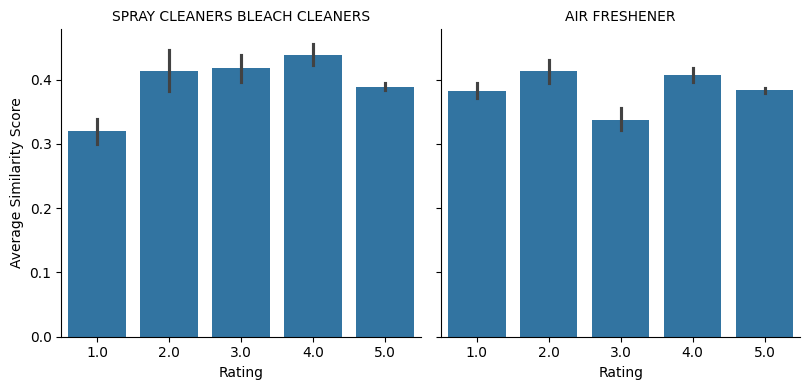

In [16]:
subcats_filter = df['subcategory'].isin(subcats)
df_avg_similarity = df[subcats_filter].groupby(['star_rating', 'subcategory']).agg({'bertopic_kmeans_similarity_score': 'mean'}).reset_index()

# Create a FacetGrid with each subcategory in a separate plot
g = sns.FacetGrid(df[subcats_filter], col='subcategory', col_wrap=3, height=4)
g.map(sns.barplot, 'star_rating', 'bertopic_kmeans_similarity_score', order=sorted(df['star_rating'].unique()))
g.set_axis_labels('Rating', 'Average Similarity Score')
g.set_titles('{col_name}')
plt.tight_layout()
plt.show()

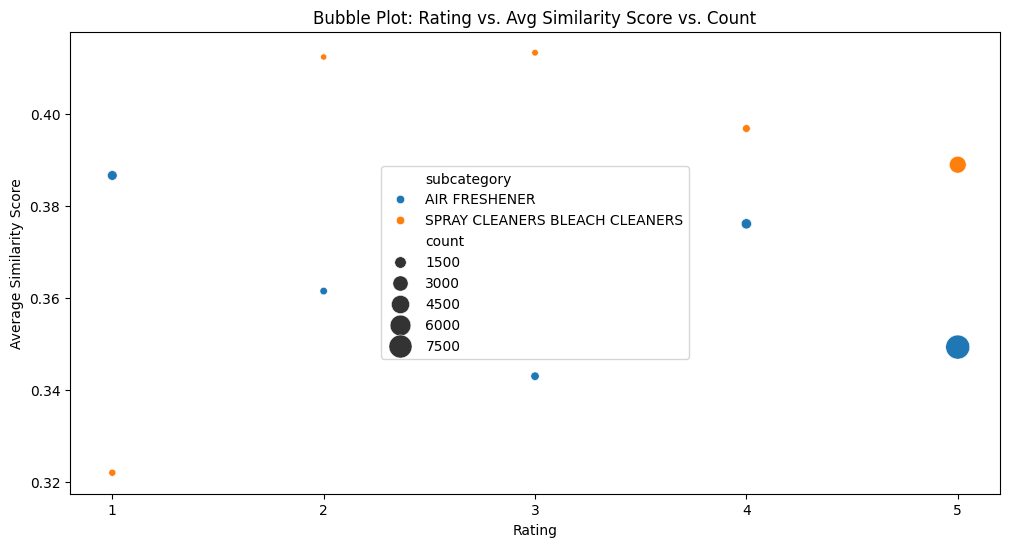

In [18]:
import numpy as np
plt.figure(figsize=(12, 6))
sns.scatterplot(data=topic_infos_rating_avgd, x='star_rating', y='bertopic_kmeans_similarity_score', 
                size='count', sizes=(20, 300), hue='subcategory')
plt.title('Bubble Plot: Rating vs. Avg Similarity Score vs. Count')
plt.xlabel('Rating')
plt.xticks(np.arange(1, 6, 1))
plt.ylabel('Average Similarity Score')
# hide legend
# plt.legend().remove()
plt.show()


In [19]:
topic_infos_df.groupby(['subcategory']).agg({'bertopic_kmeans_similarity_score': 'mean', 'count': 'sum'}).reset_index()

,subcategory,bertopic_kmeans_similarity_score,count
0,AIR FRESHENER,0.363365,11161
1,SPRAY CLEANERS BLEACH CLEANERS,0.386439,4731


In [31]:
# find reviews where bertopic_kmeans_label is ""
topic = 'Discreet and comfortable incontinence underwear with minimal leakage'
res_df[res_df['bertopic_kmeans_topic_label'] == topic].sample(5)

,subcategory,review_text,star_rating,bertopic_kmeans_topic_number,bertopic_kmeans_topic_words,bertopic_kmeans_topic_label,bertopic_kmeans_similarity_score
155825,AIR FRESHENER,these be the perfect length for light period i didnt have any issue with leak be uncomfortable noise or anything of that nature these be easy to use and put on and be super soft will buy again,5.0,1.0,"pad, incontinence, discreet, underwear, bladder, comfortable, leakage, leak, bulky, soft",Discreet and comfortable incontinence underwear with minimal leakage,0.383028
30804,AIR FRESHENER,i receive product reimbursement in exchange for my honest review this plug be really good quality compare to its competitor it rotate to fit any electrical plug and have an easily adjustable top for fragrance distribution not bulky at all and will fit in tight space love all the different scent that can be purchase with this glade warmer,5.0,1.0,"pad, incontinence, discreet, underwear, bladder, comfortable, leakage, leak, bulky, soft",Discreet and comfortable incontinence underwear with minimal leakage,0.138830
31986,AIR FRESHENER,i receive product reimbursement in exchange for my honest review,5.0,1.0,"pad, incontinence, discreet, underwear, bladder, comfortable, leakage, leak, bulky, soft",Discreet and comfortable incontinence underwear with minimal leakage,0.093199
170847,AIR FRESHENER,i find this always discreet product to be everything it proclaim on the package they be absorbent and absolutely do not make you feel like you wear a diaper they be really discreet i truly love the black color,5.0,1.0,"pad, incontinence, discreet, underwear, bladder, comfortable, leakage, leak, bulky, soft",Discreet and comfortable incontinence underwear with minimal leakage,0.585894
158227,AIR FRESHENER,ive always love use the always brand when i have my period and now aunt flow have pack up and leave menopause have be kick in and if your look for a bladder leak protection pad that be barely noticeable under your clothes always discreet moderate long incontinence pad offer up to 100 leakfree protection thanks to a unique absorbent core that absorb leak in second to keep your skin dry and comfortable for hour thank goodness for this fantastic product it have two rapiddry™ layer form a boosted protection zone in the center give you extra protection where you need it most even with unexpected leak the leakguards help to keep wetness away from the side while the lightlyscented odorlock technology neutralize odor instantly and continuously ive experienced bladder leak and this save me from an embarrassing moment seriously ladies if your look to find a right size that fit your need use the always discreet my fit chart and get the protection you need experience incredible bladder leak protection in a surprisingly discreet incontinence furthermore i choose to get the always discreet moderate long with 54 pad because it last longer and work well for me and my lifestyle,5.0,1.0,"pad, incontinence, discreet, underwear, bladder, comfortable, leakage, leak, bulky, soft",Discreet and comfortable incontinence underwear with minimal leakage,0.596755
